## Statistical Data Analysis II - Project II ##

In [1]:
import pandas as pd
import os
import numpy as np
from IPython.display import Image
from GibbsSampler import GibbsSampler

### 1. Sampling in the Rain Network ###

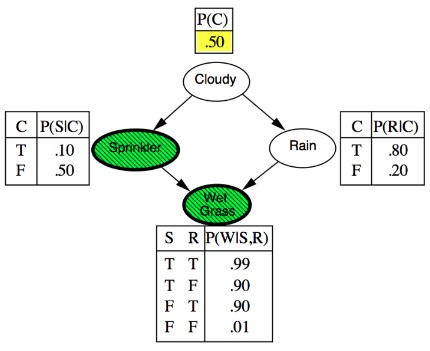

In [2]:
Image(filename='network.jpg') 

#### 1.1. Equations ####

First general equation:

$$ P(C|R,S,W) = P(C|R,S) = \frac{P(C,S,R)}{P(S,R)} = \frac{P(C,S,R)}{\sum_{C}P(C,S,R)} = \frac{P(C)P(S|C)P(R|C)}{\sum_{C}P(C)P(S|C)P(R|C)} = \frac{P(C)P(S|C)P(R|C)}{C_1}$$

1) $$ \small P(C = T|R = T, S = T, W = T) = \frac{P(C = T)P(S = T|C = T)P(R = T|C = T)}{P(C = T)P(S = T|C = T)P(R = T|C = T) + P(C = F)P(S = T|C = F)P(R = T|C = F)} = \frac{0.5 * 0.1 * 0.8}{0.5 * 0.1 * 0.8 + 0.5 * 0.5 * 0.2} \approx 0.444 $$

2) $$ \small P(C = T|R = F, S = T, W = T) = \frac{P(C = T)P(S = T|C = T)P(R = F|C = T)}{P(C = T)P(S = T|C = T)P(R = F|C = T) + P(C = F)P(S = T|C = F)P(R = F|C = F)} = \frac{0.5 * 0.1 * 0.2}{0.5 * 0.1 * 0.2 + 0.5 * 0.5 * 0.8} \approx 0.048 $$

Second geneal equation:

$$ P(R|C,S,W) = \frac{P(R,C,S,W)}{P(C,S,W)} = \frac{P(R,C,S,W)}{\sum_{R}P(R,C,S,W)} = \frac{P(C)P(S|C)P(R|C)P(W|S,R)}{\sum_{R}P(C)P(S|C)P(R|C)P(W|S,R)} = \frac{P(C)P(S|C)P(R|C)P(W|S,R)}{C_2} $$

3) $$ \small P(R = T|C = T, S = T, W = T) = \frac{P(C = T)P(S = T|C = T)P(R = T|C = T)P(W = T|S = T,R = T)}{P(C = T)P(S = T|C = T)P(R = T|C = T)P(W = T|S = T,R = T) + P(C = T)P(S = T|C = T)P(R = F|C = T)P(W = T|S = T,R = F)} = \\ = \frac{0.8 * 0.99}{0.8 * 0.99 + 0.2 * 0.9} \approx 0.815 $$

4) $$ \small P(R = T|C = F, S = T, W = T) = \frac{P(C = F)P(S = T|C = F)P(R = T|C = F)P(W = T|S = T,R = T)}{P(C = F)P(S = T|C = F)P(R = T|C = F)P(W = T|S = T,R = T) + P(C = F)P(S = T|C = F)P(R = F|C = F)P(W = T|S = T,R = F)} = \\ = \frac{0.2 * 0.99}{0.2 * 0.99 + 0.8 * 0.9} \approx 0.216 $$


#### 1.2. Estimate the marginal probability of rain, given the sprinkler is on and grass is wet P(R=T|S=T,W=T) from 100 samples ####

Based on the Gibbs sampler implementation found in the GibbsSampler.py file, 100 samples from the joint probability distribution P(R, C | S = T, W = T) were drawn. To reduce the randomness of the results used later in the report in comparisons, the 100 samples were drawn for 10 independent sampler runs. For each repetition, the marginal probability P(R=T|S=T,W=T) was estimated, and then the mean of all repetitions was calculated. The results are summarized in the table below. We can observe that the standard deviation of the obtained estimates is quite large, which may indicate a lack of convergence of the chain.

In [47]:
pd.options.display.float_format = "{:,.2f}".format
res = os.listdir('results')
res = [p for p in res if 'task1' in p]
dfs = [pd.read_csv('results/'+p) for p in res]
prob_estimate = [GibbsSampler.estimate_prob(df, 'R') for df in dfs]
prob_estimate.append(np.mean(np.array(prob_estimate)))
prob_estimate.append(np.std(np.array(prob_estimate)))
prob_estimate = np.array(prob_estimate)
columns=[str(i+1) for i in range(len(dfs))]
columns.append('mean')
columns.append('std')
df = pd.DataFrame([prob_estimate], columns=columns)
df

,1,2,3,4,5,6,7,8,9,10,mean,std
0,0.29,0.38,0.23,0.16,0.44,0.52,0.48,0.29,0.41,0.28,0.35,0.10


### 2. Convergance Diagnostics ###

#### 2.1. Draw 50,000 samples using Gibbs sampler two times. ####

5,000 samples were drawn from the joint probability distribution P(R, C | S = T, W = T) using Gibbs sampler twice and the marginal probability P(R=T|S=T,W=T) were re-estimated. The results are presented in the table below.

In [51]:
pd.options.display.float_format = "{:,.2f}".format
res = os.listdir('results')
res = [p for p in res if 'task2_50000samples' in p]
dfs = [pd.read_csv('results/'+p) for p in res]
prob_estimate = [GibbsSampler.estimate_prob(df, 'R') for df in dfs]
prob_estimate.append(np.mean(np.array(prob_estimate)))
prob_estimate = np.array(prob_estimate)
columns=[str(i+1) for i in range(len(dfs))]
columns.append('mean')
df = pd.DataFrame([prob_estimate], columns=columns)
df

,1,2,mean
0,0.31,0.31,0.31


#### 2.2. Plot of the relative frequencies of R = T and C = T up to each iteration t against t, for two independent runs of the sampler ####

To determine the *burn-in* time value, the relative frequencies of R = T and C = T plots were obtained for both runs of the sampler. In the second set of plots, the range of the x-axis was limited to be able to choose the burn-in value more accurately.

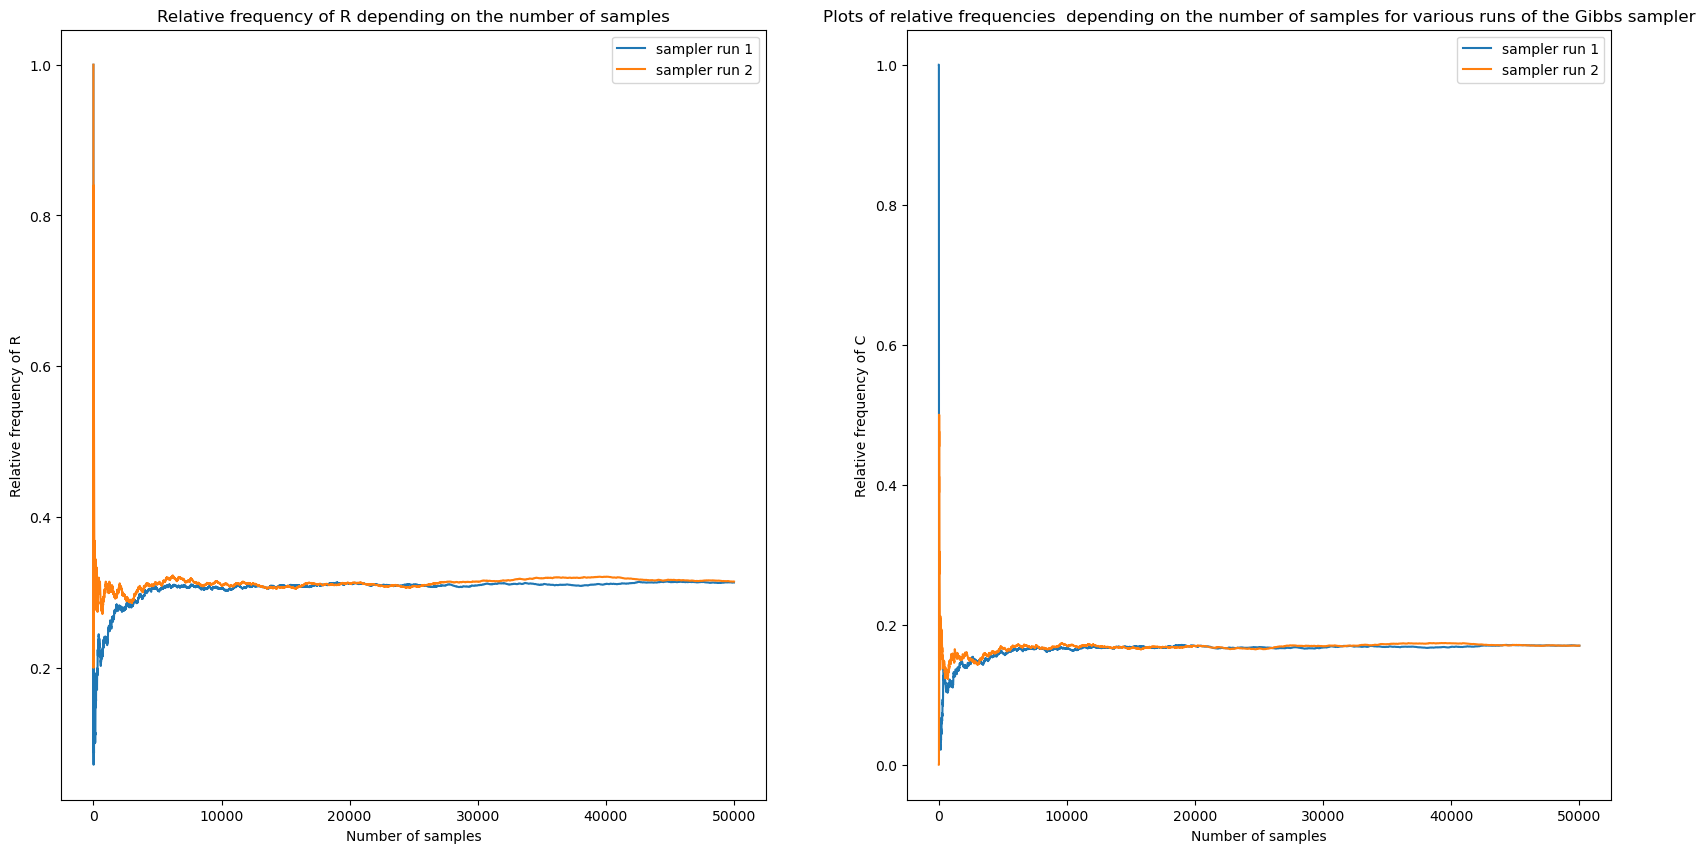

In [21]:
Image(filename='results/task2_relfreq.png', width=1200, height=400) 

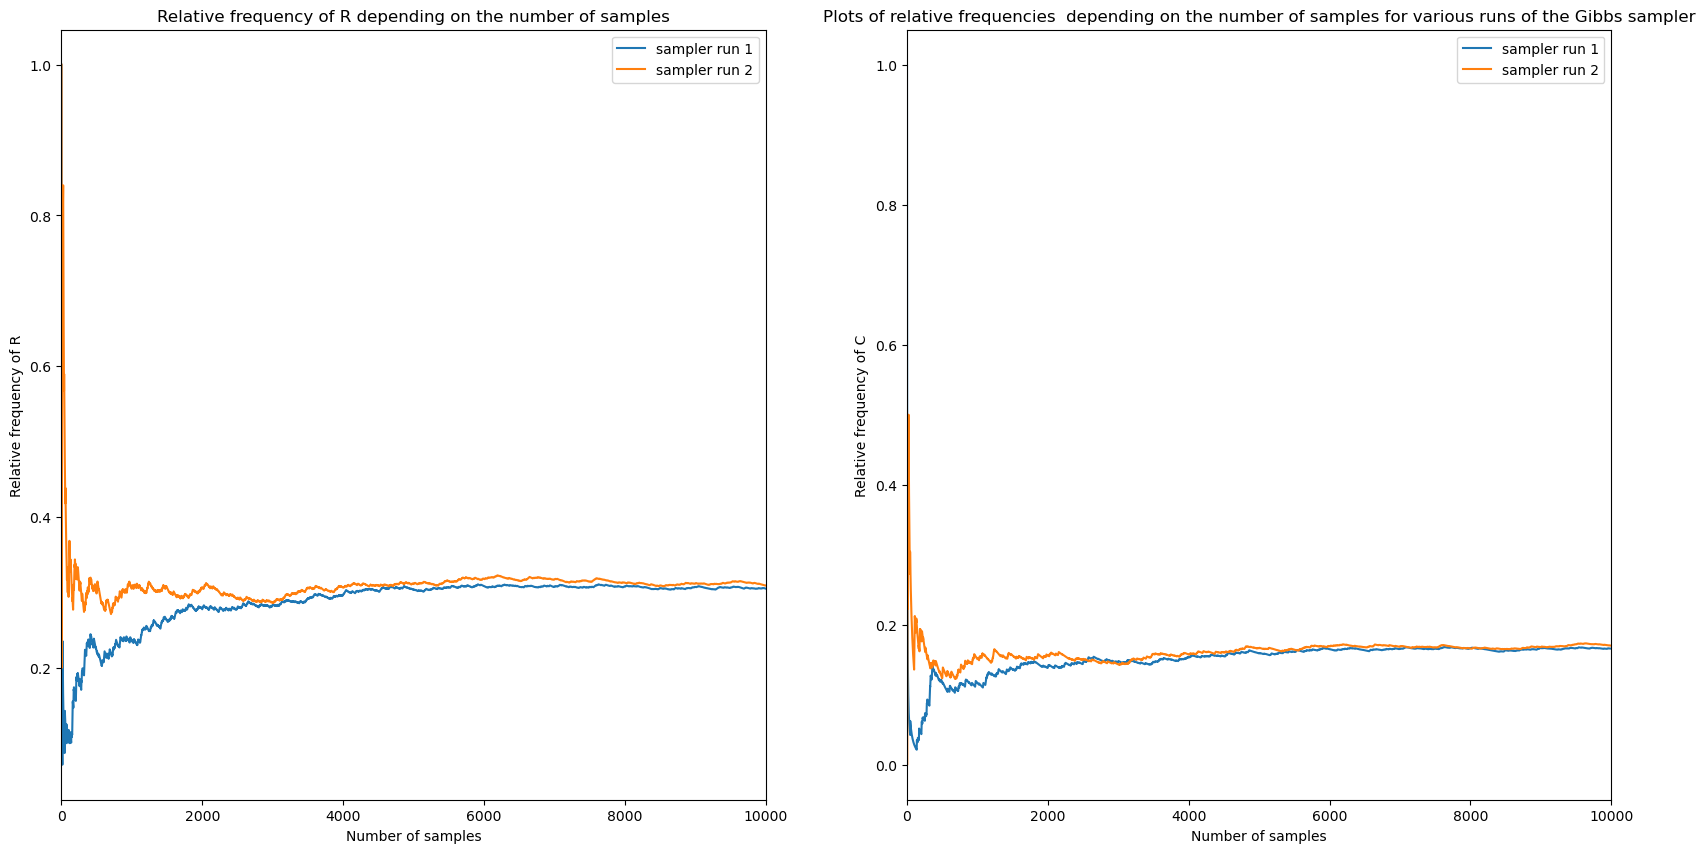

In [20]:
Image(filename='results/task2_relfreq_xlim10000.png', width=1200, height=400) 

Based on the x-axis constrained plots, the proposed ***burn-in*** time value is **2000**, due to the fact that above this number of samples the course of the plots stabilizes.

#### 2.3. Investigate the auto-correlation among the samples ####

To determine the thinning-out value, which is an interval for drawing approximately independent samples, the autocorrelation plots for variables R and C were obtained for both runs of the sampler.

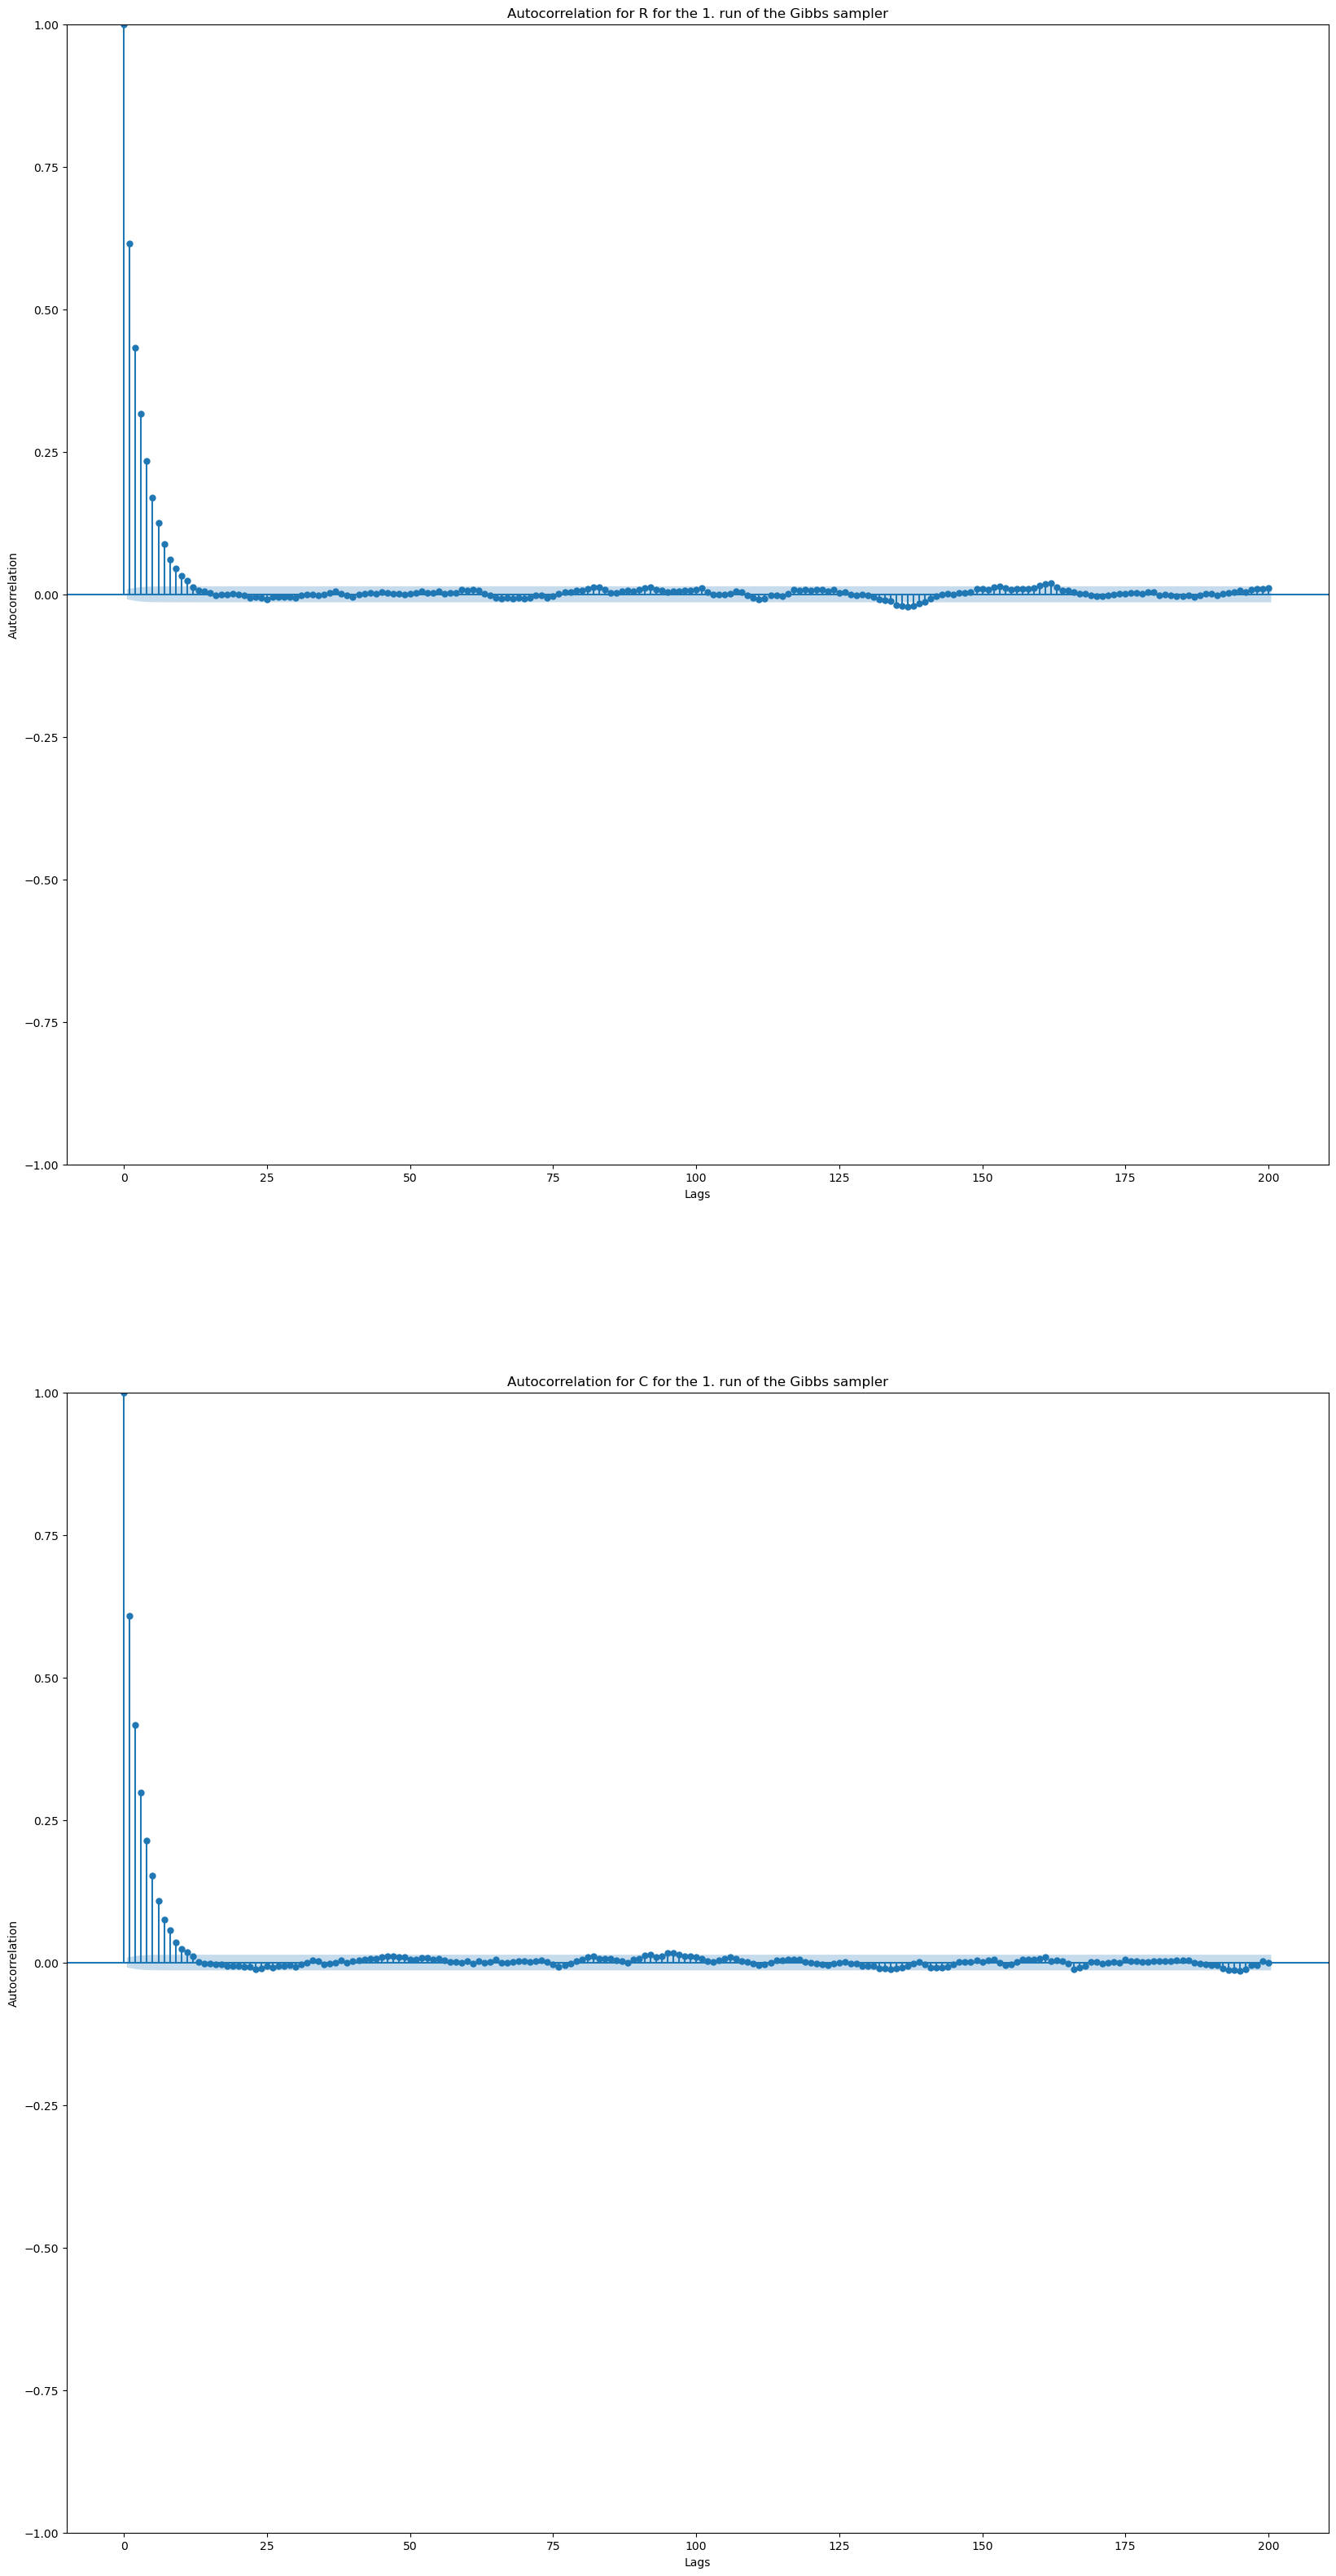

In [7]:
Image(filename='results/task2_autocorr_xlim200_1.png', width=600, height=800) 

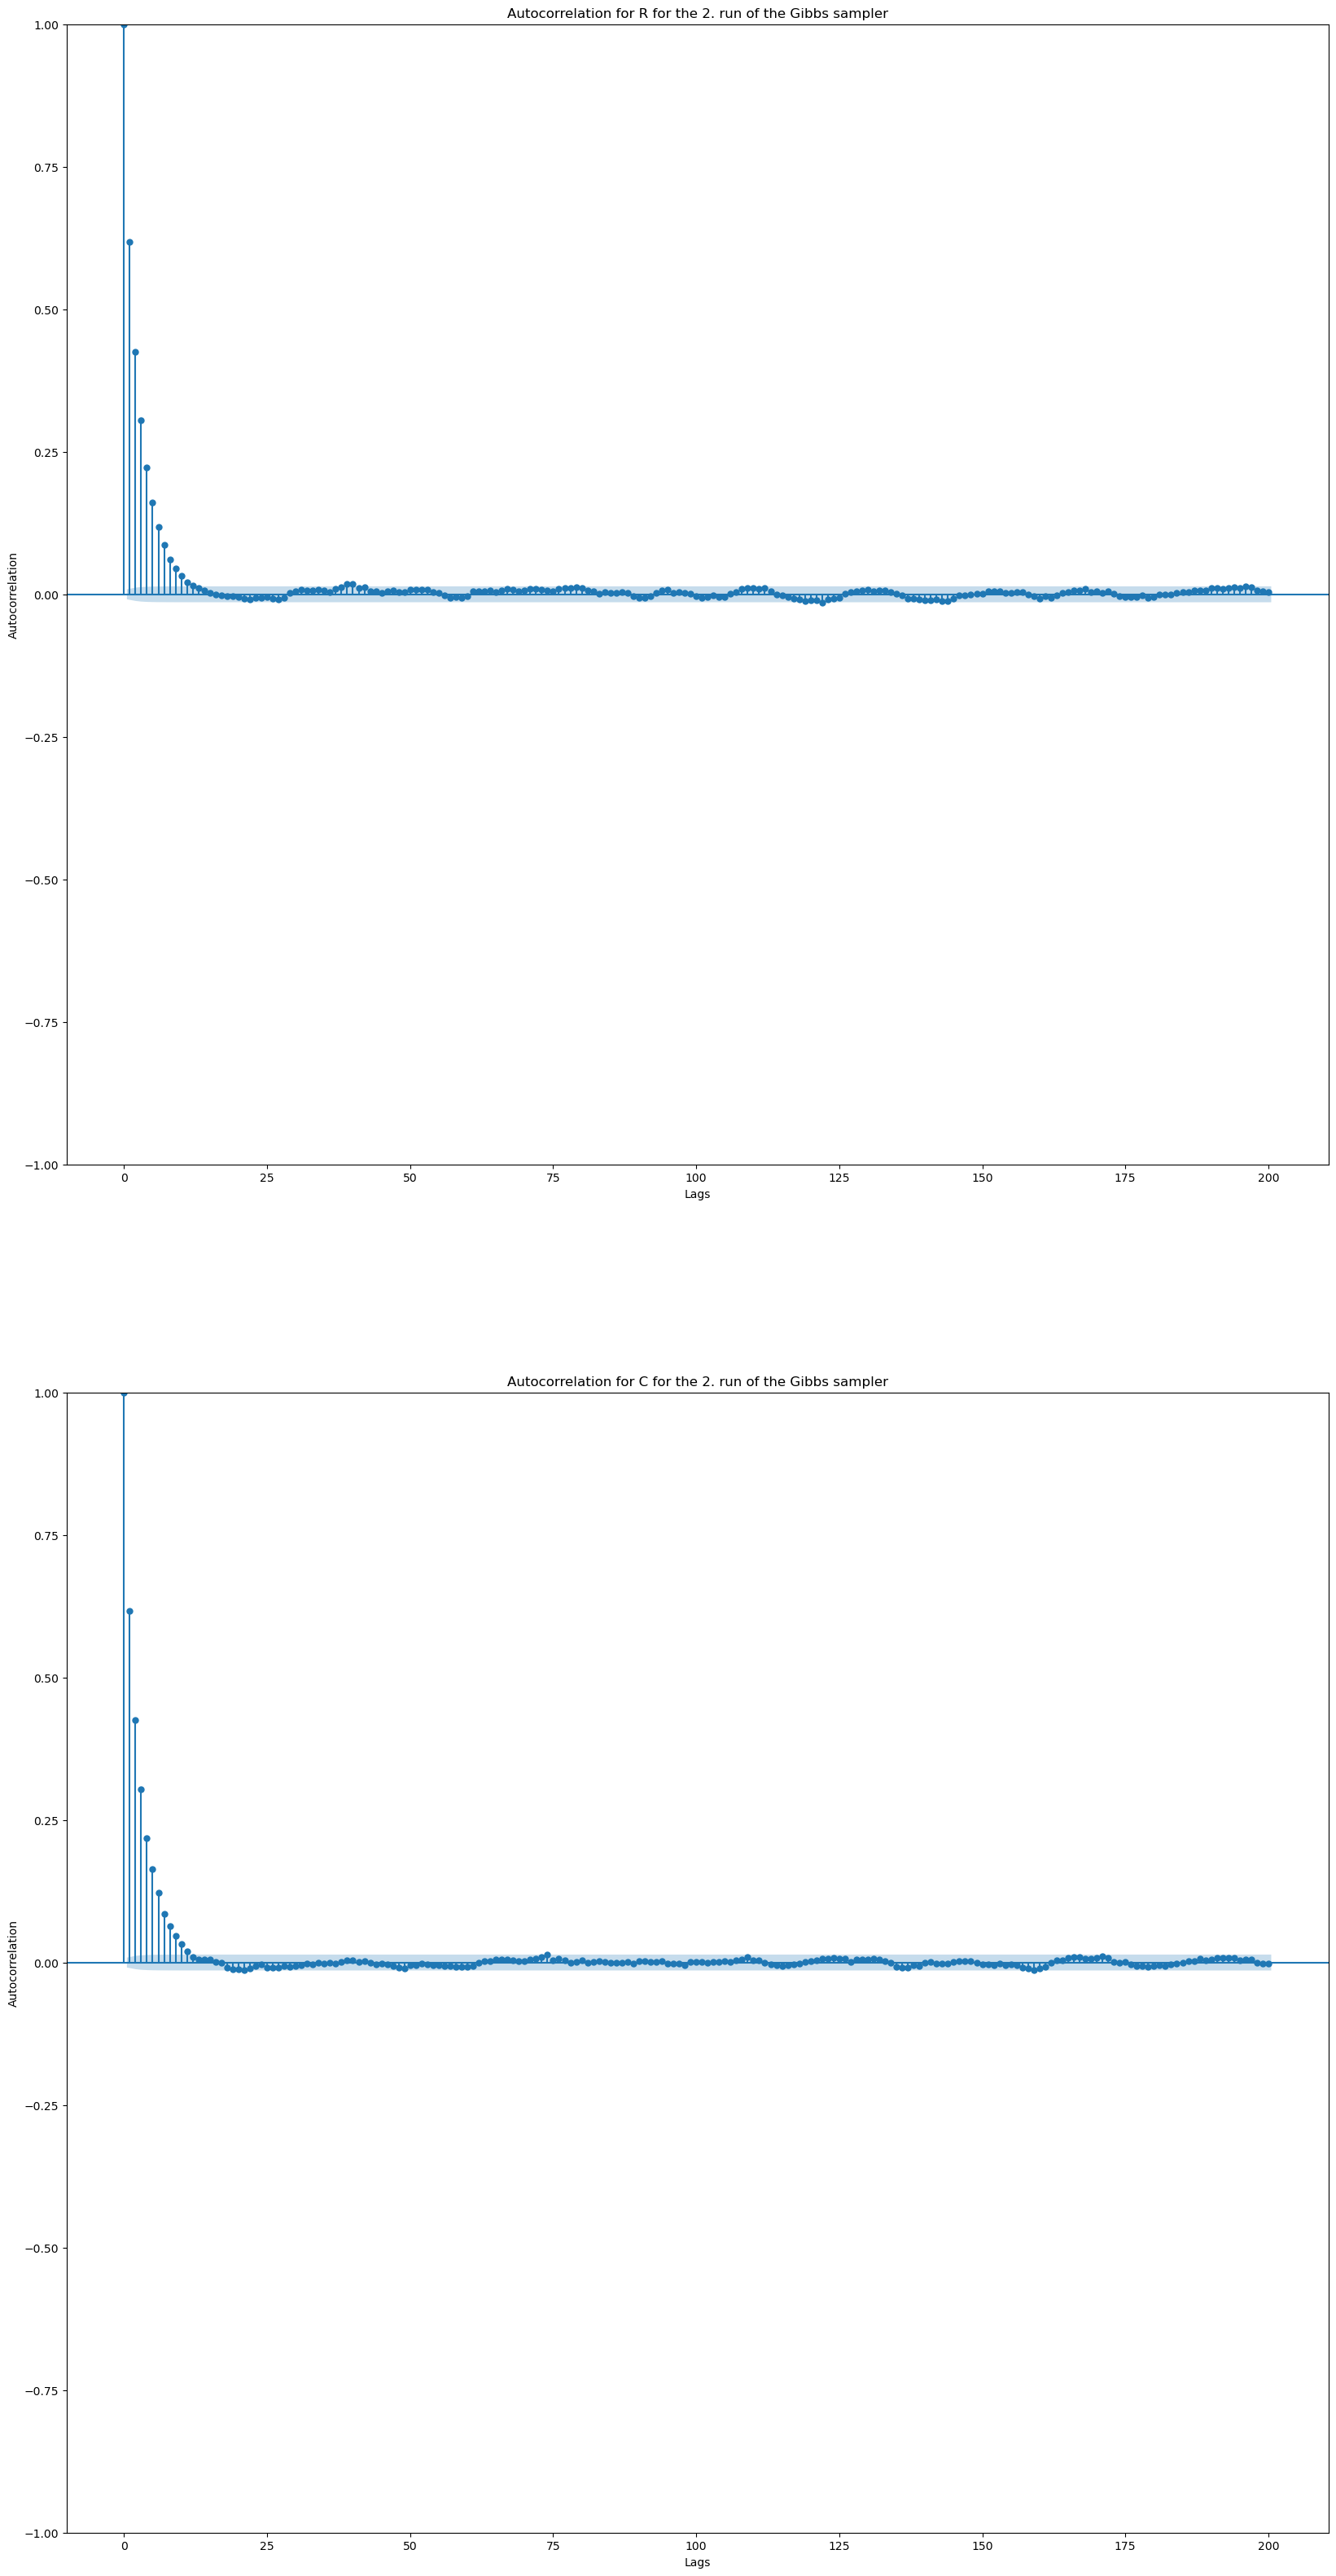

In [8]:
Image(filename='results/task2_autocorr_xlim200_2.png', width=600, height=800) 

Based on presented plots, the proposed ***thinning-out*** value is **20**, due to the fact that for this value of lags we observe small autocorrelation and all plots are stabilized.

#### 2.4.  Re-estimate P(R = T | S = T, W = T) based on 100 samples obtained after the suggested *burn-in* time and thinning-out. ####

100 samples were drawn 10 times using an improved Gibbs sampler including *burn-in* and thinning-out. Probabilities P(R = T | S = T, W = T)  were re-estimated and the mean and standard deviation were calculated. The results are summarized in the table below.

In [9]:
pd.options.display.float_format = "{:,.2f}".format
res = os.listdir('results')
res = [p for p in res if 'task2_100samples_bi2000_to20' in p]
dfs = [pd.read_csv('results/'+p) for p in res]
prob_estimate = [GibbsSampler.estimate_prob(df, 'R') for df in dfs]
prob_estimate.append(np.mean(np.array(prob_estimate)))
prob_estimate.append(np.std(np.array(prob_estimate)))
prob_estimate = np.array(prob_estimate)
columns=[str(i+1) for i in range(len(dfs))]
columns.append('mean')
columns.append('std')
df = pd.DataFrame([prob_estimate], columns=columns)
df

,1,2,3,4,5,6,7,8,9,10,mean,std
0,0.35,0.33,0.39,0.31,0.39,0.36,0.31,0.32,0.33,0.25,0.33,0.04


Compared to the results obtained for the first 10-fold draw of 100 samples without *burn-in* and thinning out, we can observe that the new estimates are less different from each other for different runs of the sampler - as evidenced by the significantly reduced standard deviation. In view of this, the use of *burn-in* and thinning-out parameters in Gibbs sampler leads to more reliable results. In addition, the convergence of the obtained chains was examined using Gelman-Rubin convergence diagnostics. For both the rainy (R) and cloudy (C) variables, **potential scale reduction statistic (R-value) of 1.0 was obtained, indicating the convergence of the chains.** This result confirmes that *burn-in* time was choosen correctly. In addition, this demonstrates the low variance between chains and the oscillation of the means of chains around a stationary distribution.

#### 2.5. Compute the probability P(R=T|S=T,W=T) analytically ####

$$ \small P(R|S,W) = \frac{P(R,S,W)}{P(S,W)} = \frac{P(R,S,W)}{\sum_{R}P(R,S,W)} = \frac{\sum_{C}P(R,S,W,C)}{\sum_{C}\sum_{R}P(R,S,W,C)} =
\frac{0.5*0.1*0.8*0.99+0.5*0.5*0.2*0.99}{0.5*0.1*0.8*0.99+0.5*0.5*0.2*0.99+0.5*0.1*0.2*0.9+0.5*0.5*0.8*0.9} \approx 0.32 $$

The mean value of the estimations obtained for the chains with *burn-in* and thinning-out is close to the analytical value. We can see that the addition of *burn-in* time and thinning-out not only reduced the standard deviation between estimates for different chains, but also brought the obtained estimate closer to the actual probability P(R=T|S=T,W=T) value.